In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-v0_8-whitegrid')

In [9]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,556.0,
       840.0,685.0,700.0,700.0,690.0,900.0,650.0,820.0,850.0,900.0,1015.0,820.0,1100.0,
       1000.0,1100.0,1000.0,1000.0])

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(perch_length,perch_weight,random_state=42)

In [11]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
lr.predict([[50]])

array([1241.83860323])

In [17]:
lr.coef_,lr.intercept_

(array([39.01714496]), -709.0186449535474)

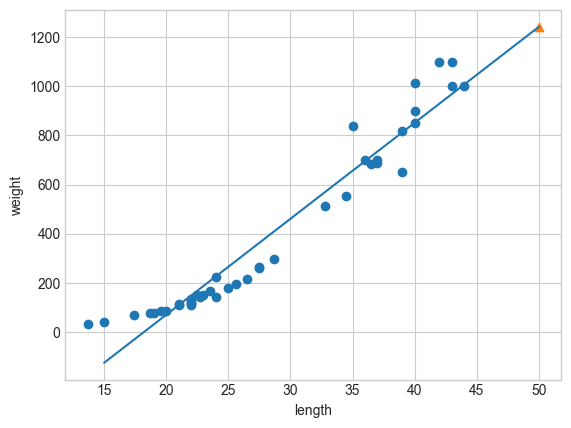

In [23]:
plt.scatter(x_train,y_train)
plt.plot([15,50],[15*lr.coef_+lr.intercept_ , 50*lr.coef_+lr.intercept_])

plt.scatter(50,1241,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
print(lr.score(x_train,y_train)) # 과소적합
print(lr.score(x_test,y_test))

0.9398463339976041
0.824750312331356


다항 회귀 (Polynomial Regression)

In [30]:
train_poly = np.column_stack((x_train ** 2,x_train))
test_poly = np.column_stack((x_test ** 2, x_test))

In [31]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [32]:
lr = LinearRegression()
lr.fit(train_poly,y_train)
lr.predict([[50**2,50]])

array([1573.98423528])

In [37]:
lr.coef_,lr.intercept_

(array([  1.01433211, -21.55792498]), 116.0502107827827)

In [38]:
lr.coef_[0]

1.0143321093767301

In [44]:
lr.predict([[50**2,50]])

array([1573.98423528])

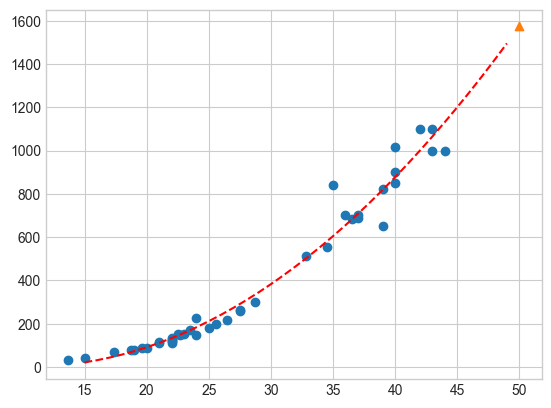

In [47]:
point = np.arange(15,50)
plt.scatter(x_train,y_train)
plt.plot(point,lr.coef_[0]*point**2+lr.coef_[1]*point+lr.intercept_,'r--')
plt.scatter(50,1574,marker='^')

In [50]:
print(lr.score(train_poly,y_train))
print(lr.score(test_poly,y_test))

0.9706807451768623
0.9775935108325122


In [ ]:
from sklearn.preprocessing import PolynomialFeatures